# Classificador Naive Bayes

In [1]:
import random
random.seed(42) # define the seed (important to reproduce the results)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#data = pd.read_csv('data/vertebralcolumn-3C.csv', header=(0))
data = pd.read_csv('data/Iris.csv', header=(0))

data = data.dropna(axis='rows') #remove NaN
# armazena os nomes das classes
classes = np.array(pd.unique(data[data.columns[-1]]), dtype=str)  

print("Número de linhas e colunas na matriz de atributos:", data.shape)
attributes = list(data.columns)
data.head(10)

Número de linhas e colunas na matriz de atributos: (150, 5)


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [2]:
data = data.to_numpy()
nrow,ncol = data.shape
y = data[:,-1]
X = data[:,0:ncol-1]

Selecionando os conjuntos de treinamento e teste.

In [3]:
from sklearn.model_selection import train_test_split
p = 0.7 # fracao de elementos no conjunto de treinamento
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = p, random_state = 42)

### Classificação: implementação do método

Inicialmente, definimos uma função para calcular a densidade de probabilidade conjunta: $$p(\vec{x}|C_i) = \prod_{j=1}^d p(x_j|C_i), \quad i=1,\ldots, k$$ 
onde $C_i$ são as classes. Se a distribuição for normal, temos que cada atributo $X_j$ tem a seguinte função densidade de probabilidade associada, para cada classe:
$$
p(x_j|C_i) = \frac{1}{\sqrt{2\pi\sigma_{C_i}}}\exp \left[ -\frac{1}{2}\left( \frac{x_j-\mu_{C_i}}{\sigma_{C_i}}\right)^2 \right], \quad i=1,2,\ldots, k.
$$
Assim, definimos uma função para calcular a função de verossimilhança.

In [4]:
def likelyhood(y, Z):
    def gaussian(x, mu, sig):
        return np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.)))
    prob = 1
    for j in np.arange(0, Z.shape[1]):
        m = np.mean(Z[:,j])
        s = np.std(Z[:,j])      
        prob = prob*gaussian(y[j], m, s)
    return prob

A seguir, realizamos a estimação para cada classe:

In [5]:
P = pd.DataFrame(data=np.zeros((X_test.shape[0], len(classes))), columns = classes) 
for i in np.arange(0, len(classes)):
    elements = tuple(np.where(y_train == classes[i]))
    Z = X_train[elements,:][0]
    for j in np.arange(0,X_test.shape[0]):
        x = X_test[j,:]
        pj = likelyhood(x,Z)
        P[classes[i]][j] = pj*len(elements)/X_train.shape[0]

Para as observações no conjunto de teste, a probabilidade pertencer a cada classe:

In [6]:
P.head(10)

,setosa,versicolor,virginica
0,1.824344e-90,4.440479e-03,4.107993e-05
1,1.652256e-04,1.196823e-16,4.171552e-23
2,6.741862e-287,3.100666e-17,2.363765e-05
3,1.609452e-93,4.042876e-03,2.146958e-04
4,2.453031e-106,8.057427e-04,3.352704e-04
5,1.491009e-03,5.335375e-15,1.159063e-22
6,1.585589e-53,3.230445e-03,2.400042e-07
7,5.666865e-172,6.868359e-10,3.319537e-03
8,3.375351e-96,8.399067e-04,1.117962e-05
9,7.866680e-60,6.780257e-03,6.579053e-07


In [7]:
from sklearn.metrics import accuracy_score

y_pred = []
for i in np.arange(0, P.shape[0]):
    c = np.argmax(np.array(P.iloc[[i]]))
    y_pred.append(P.columns[c])
y_pred = np.array(y_pred, dtype=str)

score = accuracy_score(y_pred, y_test)
print('Accuracy:', score)

Accuracy: 0.9555555555555556


### Classificação: usando a biblioteca scikit-learn

Podemos realizar a classificação usando a função disponível na biblioteca scikit-learn.

In [8]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

model = GaussianNB()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
score = accuracy_score(y_pred, y_test)
print('Accuracy:', score)

Accuracy: 0.9777777777777777


Outra maneira de efetuarmos a classificação é assumirmos que os atributos possuem distribuição diferente da normal. 

Uma possibilidade é assumirmos que os dados possuem distribuição de Bernoulli. 

In [9]:
from sklearn.naive_bayes import BernoulliNB

model = BernoulliNB()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
score = accuracy_score(y_pred, y_test)
print('Accuracy:', score)

Accuracy: 0.28888888888888886


Código completo.

In [10]:
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

random.seed(42) 

data = pd.read_csv('data/Iris.csv', header=(0))

classes = np.array(pd.unique(data[data.columns[-1]]), dtype=str)  

# Converte para matriz e vetor do numpy
data = data.to_numpy()
nrow,ncol = data.shape
y = data[:,-1]
X = data[:,0:ncol-1]

# Transforma os dados para terem media igual a zero e variancia igual a 1
#scaler = StandardScaler().fit(X)
#X = scaler.transform(X)

# Seleciona os conjuntos de treinamento e teste
p = 0.8 # fraction of elements in the test set
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size = p, random_state = 42)

# ajusta o classificador Naive-Bayes de acordo com os dados
model = GaussianNB()
model.fit(X_train, y_train)
# realiza a predicao
y_pred = model.predict(X_test)
# calcula a acuracia
score = accuracy_score(y_pred, y_test)
print('Acuracia:', score)

Acuracia: 1.0


## Região de decisão

Selecionando dois atributos, podemos visualizar a região de decisão. Para graficar a região de separação, precisamos instalar a bibliteca mlxtend: http://rasbt.github.io/mlxtend/installation/<br>
Pode ser usado: conda install -c conda-forge mlxtend

Para o classificador Naive Bayes:

In [11]:
from mlxtend.plotting import plot_decision_regions
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
import sklearn.datasets as skdata
from matplotlib import pyplot
from pandas import DataFrame

# Gera os dados em duas dimensões
n_samples = 100 # número de observações
# centro dos grupos
centers = [(-4, 0), (0, 0), (3, 3)]
X, y = skdata.make_blobs(n_samples=100, n_features=2, cluster_std=1.0, centers=centers, 
                         shuffle=False, random_state=42)

# monta a matrix de atributos
d = np.column_stack((X,np.transpose(y)))
# converte para o formato dataframe do Pandas
data = DataFrame(data = d, columns=['X1', 'X2', 'y'])
features_names = ['X1', 'X2']
class_labels = np.unique(y)

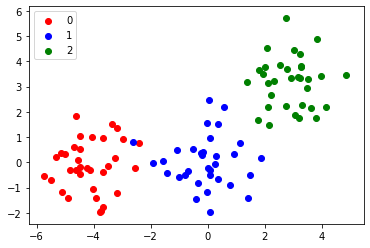

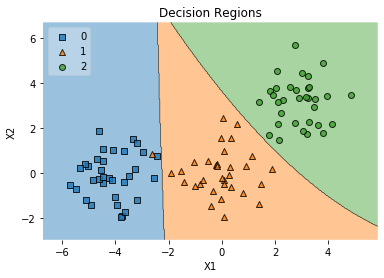

In [12]:
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.naive_bayes import GaussianNB


# mostra os dados e colori de acordo com as classes
colors = ['red', 'blue', 'green', 'black']
aux = 0
for c in class_labels:
    ind = np.where(y == c)
    plt.scatter(X[ind,0][0], X[ind,1][0], color = colors[aux], label = c)
    aux = aux + 1
plt.legend()
plt.show()

# Training a classifier
model = GaussianNB()
model.fit(X, y)

# Plotting decision regions
plot_decision_regions(X, y, clf=model, legend=2)

plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Decision Regions')
plt.show()

In [14]:
import random
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

random.seed(42) 
data = pd.read_csv('data/Iris.csv', header=(0))
# classes: setosa, virginica e versicolor
classes = pd.unique(data[data.columns[-1]])
classes = np.array(classes, dtype=str)  
# converte para matrizes do numpy
data = data.to_numpy()
nrow,ncol = data.shape
y = data[:,-1]
X = data[:,0:ncol-1]
# Seleciona o conjunto de teste e treinamento
p = 0.7 
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = p)

# funcao para calcular a verossimilhanca
def likelyhood(y, Z):
    def gaussian(x, mu, sig):
        return np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.)))
    prob = 1
    for j in np.arange(0, Z.shape[1]):
        m = np.mean(Z[:,j])
        s = np.std(Z[:,j])      
        prob = prob*gaussian(y[j], m, s)
    return prob

# matriz que armazena o produto da verossimilhanca pela priori
P = pd.DataFrame(data=np.zeros((X_test.shape[0], len(classes))), columns = classes) 
for i in np.arange(0, len(classes)):
    elements = tuple(np.where(y_train == classes[i]))
    Z = X_train[elements,:][0]
    for j in np.arange(0,X_test.shape[0]):
        x = X_test[j,:]
        pj = likelyhood(x,Z) #verossimilhanca
        pc = len(elements)/X_train.shape[0] # priori
        P[classes[i]][j] = pj*pc
        
# realiza a classificao seguindo a regra de Bayes
y_pred = []
for i in np.arange(0, P.shape[0]):
    c = np.argmax(np.array(P.iloc[[i]]))
    y_pred.append(P.columns[c])
y_pred = np.array(y_pred, dtype=str)
# calcula a acuracia na classificacao
score = accuracy_score(y_pred, y_test)
print('Accuracy:', score)

Accuracy: 1.0
